In [1]:
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

2024-03-03 15:44:16.128735: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-03 15:44:16.128909: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-03 15:44:16.299431: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
classes = {0:"T-shirt/top", 1:"Trouser", 2:"Pullover", 3:"Dress", 4:"Coat", 5:"Sandal", 6:"Shirt", 7:"Sneaker", 8:"Bag", 9:"Ankle Boot"}

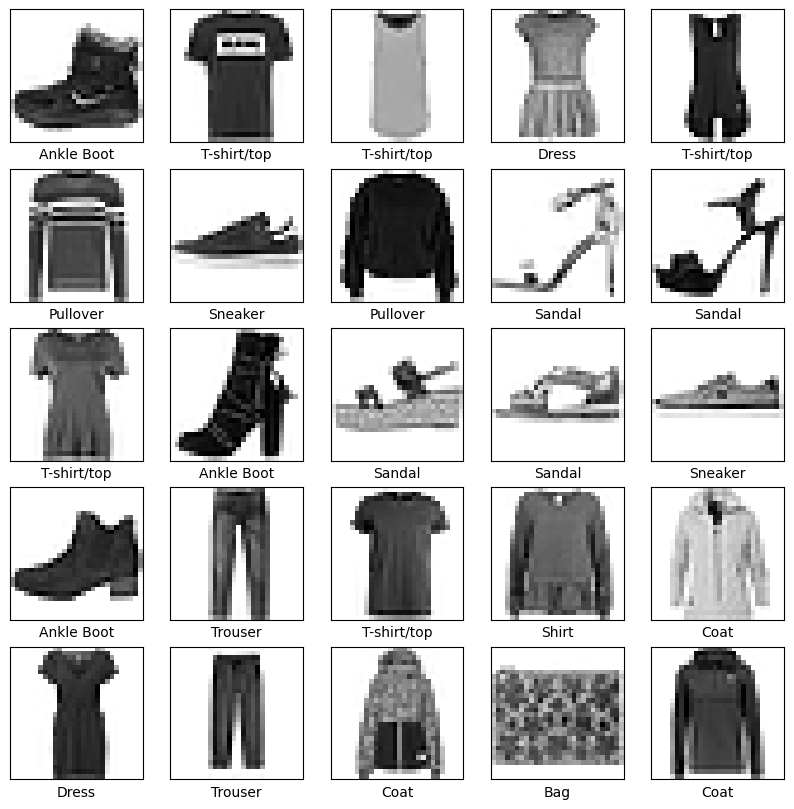

In [5]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(classes[y_train[i]])
plt.show()

In [6]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [7]:
x_train_norm = x_train/255.0;
x_test_norm = x_test/255.0;

In [8]:
print(x_train_norm[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [9]:
#Taking pixels as inputs
num_of_pixels = 28 * 28                                                         #28 * 28 = 784 pixels
x_train_input = x_train_norm.reshape(60000, num_of_pixels)                      #flattening the image into 1d array
x_test_input = x_test_norm.reshape(10000, num_of_pixels)                        #same thing
x_train_input = x_train_input.T
x_test_input = x_test_input.T
print(x_train_input.shape)
print(x_test_input.shape)

(784, 60000)
(784, 10000)


In [10]:
hidden_neurons_list = [128, 128]
num_hidden_layers = 2
output_neurons = len(classes)

In [11]:
def initialize_parameters(num_of_pixels, hidden_neurons_list, num_hidden_layers, output_neurons):
    weights = {}
    biases = {}
    for l in range(num_hidden_layers):
        weights[l] = np.random.rand(hidden_neurons_list[l], num_of_pixels if l == 0 else hidden_neurons_list[l-1]) - 0.5
        biases[l] = np.random.rand(hidden_neurons_list[l], 1) - 0.5
    weights[num_hidden_layers] = np.random.rand(output_neurons, hidden_neurons_list[-1]) - 0.5
    biases[num_hidden_layers] = np.random.rand(output_neurons, 1) - 0.5
    return weights, biases

In [12]:
weights, biases = initialize_parameters(num_of_pixels, hidden_neurons_list, num_hidden_layers, output_neurons)
print(weights[0].shape)
print(biases[0].shape)

(128, 784)
(128, 1)


In [13]:
print(biases[2])

[[-0.01494188]
 [ 0.46840992]
 [ 0.45497479]
 [ 0.27649947]
 [-0.11089957]
 [-0.15347051]
 [-0.06113962]
 [-0.36137033]
 [ 0.01834441]
 [ 0.24299164]]


In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

def feedforward_propagation(X, weights, biases, num_hidden_layers):
    a = {}
    h = {}
    for k in range(num_hidden_layers):
        if k == 0:
            a[k] = np.dot(weights[k], X) + biases[k]
            h[k] = sigmoid(a[k])
        else:
            a[k] = np.dot(weights[k], h[k-1]) + biases[k]
            h[k] = sigmoid(a[k])
    a[num_hidden_layers] = np.dot(weights[num_hidden_layers], h[num_hidden_layers - 1]) + biases[num_hidden_layers]
    y_hat = softmax(a[num_hidden_layers])
    return y_hat

In [15]:
predicted_output = feedforward_propagation(x_test_input, weights, biases, num_hidden_layers)
print(predicted_output.shape)
print(y_test.shape)

(10, 10000)
(10000,)


In [16]:
y_pred = np.argmax(predicted_output, axis = 0)
print(y_pred[10])
print(y_test[10])

9
4


In [17]:
print(y_pred[:50])
print(y_test[:50])

[9 9 9 9 9 1 9 1 9 9 9 9 9 9 1 9 9 9 9 9 1 9 9 9 9 9 1 9 9 9 1 9 9 9 9 9 9
 9 9 9 9 1 9 9 1 9 1 9 9 1]
[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7
 5 7 9 6 1 3 7 6 7 2 1 2 2]


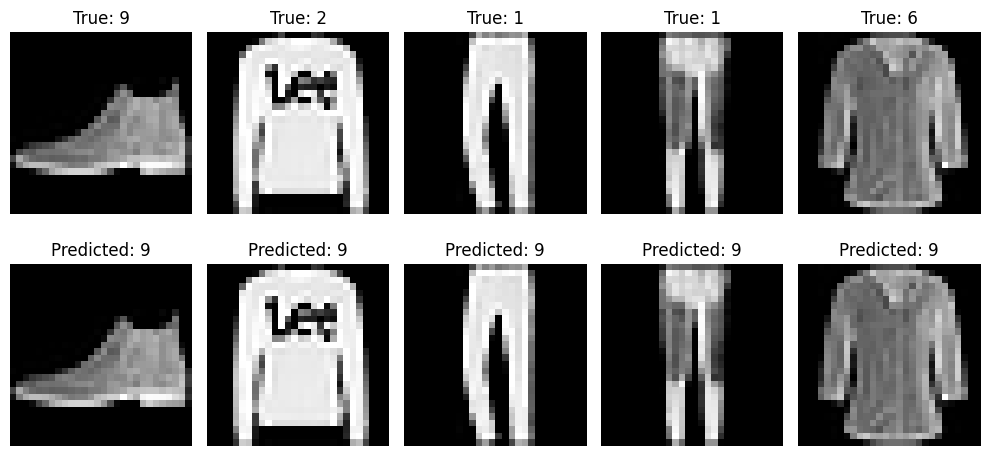

In [18]:
def plot_images(images, labels, pred, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(2, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'True: {labels[i]}')
        plt.axis('off')
        
        plt.subplot(2, num_images, i + num_images + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Predicted: {pred[i]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Plot images
plot_images(x_test, y_test, y_pred)

In [19]:
# def one_hot(Y):
#     one_hot_Y = np.zeros((Y.size, Y.max() + 1))
#     one_hot_Y[np.arange(Y.size), Y] = 1
#     return one_hot_Y.T

# def backward_propagation(fwd_a, fwd_h, Y, Y_hat, num_hidden_layers):
#     one_hot_Y = one_hot(Y)
#     op_gradient = predicted_output - one_hot_Y
#     for k in reversed(range(num_hidden_layers-1)):
#         #compute gradients wrt parameters
#         dW_gradient = 
#         dB_gradient = dA_gradient
        
#         #compute gradients wrt layer below
        
#         #compute gradients wrt layer below (pre activation)
        

In [20]:
#print(op_grad.shape)